# Falling Ball Viscometer
## Example E3 from NIST 1900

Reference: NIST Technical Note 1900 (http://dx.doi.org/10.6028/NIST.TN.1900)

This example demonstrates loading the configuration from a file.

In [1]:
import suncal

In [2]:
u = suncal.UncertCalc.from_configfile('../ex_viscometer.yaml')
out = u.calculate()
out.report(n=3)

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$\mu_{m}$   | GUM          | 5.69 mPa·s  | 1.03 mPa·s           | ± 2.01 mPa·s     | 1.960     | inf           |
|$\mu_{m}$   | Monte Carlo  | 5.83 mPa·s  | 1.11 mPa·s           | (4.06 mPa·s, 8.40 mPa·s) | 1.948     | -             |

In [3]:
u.out.report_inputs()

|Variable   | Mean      | Std. Uncertainty   | Deg. Freedom   | Description                              |
|----------|---------|------------------|--------------|-----------------------------------------|
|$\mu_{c}$   | 4.630  | 0.046 mPa·s           | inf       | Viscosity of calibration liquid          |
|$\rho_{b}$   | 2217.00  | 0.50 kg/m³           | inf       | Density of ball                          |
|$\rho_{c}$   | 810.00  | 0.50 kg/m³           | inf       | Density of calibration liquid            |
|$\rho_{m}$   | 1180.00  | 0.50 kg/m³          | inf      | Density of sodium hydroxide solution     |
|$t_{c}$   | 36.6 | 5.5 s          | inf      | Travel time in calibration liquid        |
|$t_{m}$   | 61.0 | 6.1 s          | inf      | Travel time in sodium hydroxide solution |

In [4]:
u.out.report_expanded()

### GUM Approximation


|Function   | Interval   | Min       | Max       | k         | Deg. Freedom   | Expanded Uncertainty  |
|----------|----------|---------|---------|---------|--------------|----------------------|
|$\mu_{m}$   | 99.00%     | 3.0 mPa·s  | 8.3 mPa·s  | 2.576     | inf            | 2.6 mPa·s              |
|-          | 95.00%     | 3.7 mPa·s  | 7.7 mPa·s  | 1.960     | inf            | 2.0 mPa·s              |
|-          | 90.00%     | 4.0 mPa·s  | 7.4 mPa·s  | 1.645     | inf            | 1.7 mPa·s              |
|-          | 68.00%     | 4.7 mPa·s  | 6.7 mPa·s | 0.994     | inf            | 1.0 mPa·s             |


### Monte Carlo

Symmetric Coverage Intervals

|Function   | Interval   | Min       | Max       | k        |
|----------|----------|---------|---------|---------|
|$\mu_{m}$   | 99.00%     | 3.7 mPa·s  | 9.7 mPa·s  | 2.720    |
|-          | 95.00%     | 4.1 mPa·s  | 8.4 mPa·s  | 1.948    |
|-          | 90.00%     | 4.3 mPa·s  | 7.8 mPa·s  | 1.599    |
|-          | 68.00%     | 4.8 mPa·s  | 6.9 mPa·s  | 0.934    |

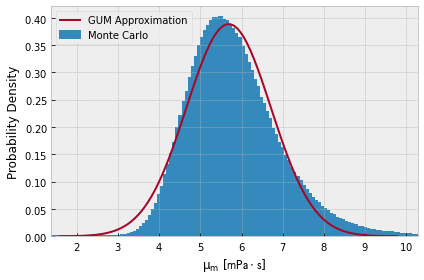

In [5]:
# Compare to NIST1900 Exhibit 3.
u.out.plot_pdf();

In [6]:
# What did the GUM calculation actually do?
u.out.gum.report_derivation(solve=True)

### Measurement Model:

$\mu_{m} = \frac{\mu_{c} t_{m} \left(\rho_{b} - \rho_{m}\right)}{t_{c} \left(\rho_{b} - \rho_{c}\right)}$

### Measured Values:


|Variable   | Std. Uncertainty   | Deg. Freedom  |
|----------|------------------|--------------|
|$\mu_{c} = 4.63$   | $u_{\mu c} = 0.0463\,\mathrm{mPa} \cdot \mathrm{s}$           | $\nu_{\mu c} = \infty$      |
|$\rho_{b} = 2217.0$   | $u_{\rho b} = 0.5\,\frac{\mathrm{kg}}{\mathrm{m}^{3}}$           | $\nu_{\rho b} = \infty$      |
|$\rho_{c} = 810.0$   | $u_{\rho c} = 0.5\,\frac{\mathrm{kg}}{\mathrm{m}^{3}}$           | $\nu_{\rho c} = \infty$      |
|$\rho_{m} = 1180.0$  | $u_{\rho m} = 0.5\,\frac{\mathrm{kg}}{\mathrm{m}^{3}}$          | $\nu_{\rho m} = \infty$     |
|$t_{c} = 36.6$  | $u_{t c} = 5.49\,\mathrm{s}$          | $\nu_{t c} = \infty$     |
|$t_{m} = 61.0$  | $u_{t m} = 6.1\,\mathrm{s}$          | $\nu_{t m} = \infty$     |


### Sensitivity Coefficients:

$\frac{\partial}{\partial \mu_{c}} \mu_{m} = \frac{t_{m} \left(\rho_{b} - \rho_{m}\right)}{t_{c} \left(\rho_{b} - \rho_{c}\right)}$  $ = 1.2284$ 

$\frac{\partial}{\partial \rho_{b}} \mu_{m} = \frac{\mu_{c} t_{m} \left(- \rho_{c} + \rho_{m}\right)}{t_{c} \left(\rho_{b} - \rho_{c}\right)^{2}}$  $ = 0.0014$ m³·mPa·s/kg

$\frac{\partial}{\partial \rho_{c}} \mu_{m} = \frac{\mu_{c} t_{m} \left(\rho_{b} - \rho_{m}\right)}{t_{c} \left(\rho_{b} - \rho_{c}\right)^{2}}$  $ = 0.0040$ m³·mPa·s/kg

$\frac{\partial}{\partial \rho_{m}} \mu_{m} = - \frac{\mu_{c} t_{m}}{t_{c} \left(\rho_{b} - \rho_{c}\right)}$  $ = -0.0055$ m³·mPa·s/kg

$\frac{\partial}{\partial t_{c}} \mu_{m} = \frac{\mu_{c} t_{m} \left(- \rho_{b} + \rho_{m}\right)}{t_{c}^{2} \left(\rho_{b} - \rho_{c}\right)}$  $ = -0.1554$ mPa

$\frac{\partial}{\partial t_{m}} \mu_{m} = \frac{\mu_{c} \left(\rho_{b} - \rho_{m}\right)}{t_{c} \left(\rho_{b} - \rho_{c}\right)}$  $ = 0.0932$ mPa

### Combined Uncertainty:

$u_{\mu m} = \sqrt{u_{\mu c}^{2} \left(\frac{\partial}{\partial \mu_{c}} \mu_{m}\right)^{2} + u_{\rho b}^{2} \left(\frac{\partial}{\partial \rho_{b}} \mu_{m}\right)^{2} + u_{\rho c}^{2} \left(\frac{\partial}{\partial \rho_{c}} \mu_{m}\right)^{2} + u_{\rho m}^{2} \left(\frac{\partial}{\partial \rho_{m}} \mu_{m}\right)^{2} + u_{t c}^{2} \left(\frac{\partial}{\partial t_{c}} \mu_{m}\right)^{2} + u_{t m}^{2} \left(\frac{\partial}{\partial t_{m}} \mu_{m}\right)^{2}}$

$u_{\mu m} = \sqrt{\frac{\mu_{c}^{2} t_{c}^{2} t_{m}^{2} \left(u_{\rho b}^{2} \left(\rho_{c} - \rho_{m}\right)^{2} + u_{\rho c}^{2} \left(\rho_{b} - \rho_{m}\right)^{2}\right) + \mu_{c}^{2} t_{m}^{2} u_{t c}^{2} \left(\rho_{b} - \rho_{c}\right)^{2} \left(\rho_{b} - \rho_{m}\right)^{2} + t_{c}^{2} \left(\rho_{b} - \rho_{c}\right)^{2} \left(\mu_{c}^{2} t_{m}^{2} u_{\rho m}^{2} + \mu_{c}^{2} u_{t m}^{2} \left(\rho_{b} - \rho_{m}\right)^{2} + t_{m}^{2} u_{\mu c}^{2} \left(\rho_{b} - \rho_{m}\right)^{2}\right)}{t_{c}^{4} \left(\rho_{b} - \rho_{c}\right)^{4}}} = 1.027\,\mathrm{mPa} \cdot \mathrm{s}$

### Effective degrees of freedom:

$\nu_{\mu m} = \frac{u_{\mu m}^{4}}{\frac{\mu_{c}^{4} u_{t m}^{4} \left(\rho_{b} - \rho_{m}\right)^{4}}{\nu_{t m} t_{c}^{4} \left(\rho_{b} - \rho_{c}\right)^{4}} + \frac{\mu_{c}^{4} t_{m}^{4} u_{t c}^{4} \left(- \rho_{b} + \rho_{m}\right)^{4}}{\nu_{t c} t_{c}^{8} \left(\rho_{b} - \rho_{c}\right)^{4}} + \frac{\mu_{c}^{4} t_{m}^{4} u_{\rho m}^{4}}{\nu_{\rho m} t_{c}^{4} \left(\rho_{b} - \rho_{c}\right)^{4}} + \frac{\mu_{c}^{4} t_{m}^{4} u_{\rho c}^{4} \left(\rho_{b} - \rho_{m}\right)^{4}}{\nu_{\rho c} t_{c}^{4} \left(\rho_{b} - \rho_{c}\right)^{8}} + \frac{\mu_{c}^{4} t_{m}^{4} u_{\rho b}^{4} \left(- \rho_{c} + \rho_{m}\right)^{4}}{\nu_{\rho b} t_{c}^{4} \left(\rho_{b} - \rho_{c}\right)^{8}} + \frac{t_{m}^{4} u_{\mu c}^{4} \left(\rho_{b} - \rho_{m}\right)^{4}}{\nu_{\mu c} t_{c}^{4} \left(\rho_{b} - \rho_{c}\right)^{4}}} = \infty$